<a href="https://colab.research.google.com/github/squadOito/soulcodead2/blob/joseaureliok%2Fnotebook/notebooks/notebook_geracao_distribuida_bruto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto Final**
Escola: SoulCode Academy

Curso: Bootcamp Analista de Dados - Martech - AD2

**Equipe 08**

**Integrantes**: Adriano, José Aurelio, Marcos Paulo, Paulo Vitorino, Renato e Wesley

Professores: Douglas Ribeiro, Franciane Rodrigues e Jonathas Carneiro

## Preparação de Ambiente
Instalações e importações das bibliotecas necessárias para o processo de ETL.

In [1]:
# instalaçao de biblioteca para interagir com google cloud
!pip install gcsfs -q

In [2]:
# instalaçao de biblioteca para validar dados com pandera
!pip install pandera -q

In [3]:
# Importando Bibliotecas
import os
import pandas as pd
import numpy as np
import pandera as pa
import re
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib import pyplot as plt
from google.cloud import storage
from google.colab import drive
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

In [4]:
# Ignorando alguns alertas desnecessários
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Configuração da quantidade de colunas para aparecer em um DataFrame
pd.set_option('display.max_columns',100)

### Compartilhamento Chave GDrive

In [6]:
# Cria compartilhamento com Google Drive
drive.mount('/content/drive', force_remount=True)

# Arquivo a ser acessado na pasta compartilhada
target = 'projeto-final-ad2-e8-ae566c3a2c2b.json'

# Caminho completo da pasta compartilhada
folder = '/content/drive/MyDrive/Classroom/AD2 - Analista de Dados/ProjetoFinal'

# Acesso ao arquivo no colab
serviceAccount = os.path.join(folder, target)

Mounted at /content/drive


# ETL
Extração, transformação, carregamento dos dados



## Extração
A primeira etapa da ETL é a extração dos dados de sua fonte original. Dependendo do tipo de dados e da fonte, você pode precisar de diferentes ferramentas e técnicas para extrair os dados.

In [7]:
# Conexão com a conta do Google Cloud
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = serviceAccount

In [8]:
# Conexão com a bucket do Google Cloud
client = storage.Client()
bucket = client.get_bucket('projeto-final-ad2-e8')

In [9]:
# Caminhodo arquivo
path = "gs://projeto-final-ad2-e8/dados/pre-analise/geracao_distribuida_pre.csv"

*Read* Pandas

In [10]:
# Leitura dataframe pandas
read = pd.read_csv(path,
                         sep= ',',
                         encoding = 'utf-8')

In [11]:
# exibindo primeiras linhas
read.head(10)

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,SigUF,codRegiao,NomRegiao,CodMunicipioIbge,NomMunicipio,CodCEP,SigTipoConsumidor,NumCPFCNPJ,NomeTitularEmpreendimento,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomSubEstacao,NumCoordESub,NumCoordNSub
0,2023-07-31,07/2023,8.336783e+12,CELESC-DIS,CELESC DISTRIBUI�ÃO S.A,5,Poder Público,11,B3,42.0,SC,4204.0,Sul,4210852.0,Mirim Doce,00000000,PJ,95952289000155,MIRIM DOCE CAMARA DE VEREADORES,GD.SC.000.188.684,2020-01-20,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,500,NaN,NaN,NaN,NaN,NaN
1,2023-07-31,07/2023,6.169523e+13,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,6,Serviço Público,7,A4,35.0,SP,3515.0,Sudeste,3550308.0,São Paulo,01109010,PJ,10882594001722,"INSTITUTO FEDERAL DE EDUCA�ÃO, CIÊNCIA E TECN.",GD.SP.000.027.612,2017-07-12,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,6996,NaN,NaN,NaN,NaN,NaN
2,2023-07-31,07/2023,6.169523e+13,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,Poder Público,9,B1,35.0,SP,3515.0,Sudeste,3550308.0,São Paulo,04115***,PF,***.015.418-**,***,GD.SP.000.081.118,2019-05-30,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,300,NaN,NaN,NaN,NaN,NaN
3,2023-07-31,07/2023,6.169523e+13,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,Poder Público,9,B1,35.0,SP,3515.0,Sudeste,3510609.0,Carapicuíba,06364***,PF,***.517.398-**,***,GD.SP.000.210.094,2020-03-30,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,300,NaN,NaN,NaN,NaN,NaN
4,2023-07-31,07/2023,6.169523e+13,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,Poder Público,7,A4,35.0,SP,3515.0,Sudeste,3505708.0,Barueri,06462080,PJ,46523015000135,MUNICIPIO DE BARUERI,GD.SP.000.863.525,2021-04-02,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,2300,-2351.0,-4688.0,NaN,NaN,NaN
5,2023-07-31,07/2023,2.302100e+12,EDP SP,EDP SÃO PAULO DISTRIBUI�ÃO DE ENERGIA S.A.,5,Poder Público,11,B3,35.0,SP,3515.0,Sudeste,3518800.0,Guarulhos,07160640,PJ,46319000000150,MUNICIPIO DE GUARULHOS,GD.SP.000.251.356,2020-06-09,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,284,-2346.0,-4650.0,NaN,NaN,NaN
6,2023-07-31,07/2023,6.169523e+13,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,Poder Público,11,B3,35.0,SP,3515.0,Sudeste,3550308.0,São Paulo,08265060,PJ,74118514000182,SAO PAULO SECRETARIA VERDE MEIO AMB,GD.SP.000.049.685,2018-12-11,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,300,NaN,NaN,NaN,NaN,NaN
7,2023-07-31,07/2023,2.302100e+12,EDP SP,EDP SÃO PAULO DISTRIBUI�ÃO DE ENERGIA S.A.,6,Serviço Público,7,A4,35.0,SP,3515.0,Sudeste,3552502.0,Suzano,08683000,PJ,43776517000180,CIA DE SANEAMENTO BASICO DO ESTADO DE S,GD.SP.001.908.917,2023-06-07,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Minigeracao,200000,74.0,-20.0,NaN,NaN,NaN
8,2023-07-31,07/2023,2.302100e+12,EDP SP,EDP SÃO PAULO DISTRIBUI�ÃO DE ENERGIA S.A.,5,Poder Público,7,A4,35.0,SP,3515.0,Sudeste,3530607.0,Mogi das Cruzes,08750770,PJ,46523270000188,MUNICIPIO DE MOGI DAS CRUZES,GD.SP.000.351.911,2020-10-19,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,6000,-2300.0,-4700.0,NaN,NaN,NaN
9,2023-07-31,07/2023,2.302100e+12,EDP SP,EDP SÃO PAULO DISTRIBUI�ÃO DE ENERGIA S.A.,5,Poder Público,9,B1,35.0,SP,3513.0,Sudeste,3550704.0,São Sebastião,11619***,PF,***.090.248-**,***,GD.SP.000.314.370,2020-10-05,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,200,NaN,NaN,NaN,NaN,NaN


In [12]:
# renomeação do dataframe lido
df = read

## Pré-análise

In [13]:
# Visualização geral
display(df)

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,SigUF,codRegiao,NomRegiao,CodMunicipioIbge,NomMunicipio,CodCEP,SigTipoConsumidor,NumCPFCNPJ,NomeTitularEmpreendimento,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomSubEstacao,NumCoordESub,NumCoordNSub
0,2023-07-31,07/2023,8.336783e+12,CELESC-DIS,CELESC DISTRIBUI�ÃO S.A,5,Poder Público,11,B3,42.0,SC,4204.0,Sul,4210852.0,Mirim Doce,00000000,PJ,95952289000155,MIRIM DOCE CAMARA DE VEREADORES,GD.SC.000.188.684,2020-01-20,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,500,NaN,NaN,NaN,NaN,NaN
1,2023-07-31,07/2023,6.169523e+13,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,6,Serviço Público,7,A4,35.0,SP,3515.0,Sudeste,3550308.0,São Paulo,01109010,PJ,10882594001722,"INSTITUTO FEDERAL DE EDUCA�ÃO, CIÊNCIA E TECN.",GD.SP.000.027.612,2017-07-12,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,6996,NaN,NaN,NaN,NaN,NaN
2,2023-07-31,07/2023,6.169523e+13,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,Poder Público,9,B1,35.0,SP,3515.0,Sudeste,3550308.0,São Paulo,04115***,PF,***.015.418-**,***,GD.SP.000.081.118,2019-05-30,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,300,NaN,NaN,NaN,NaN,NaN
3,2023-07-31,07/2023,6.169523e+13,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,Poder Público,9,B1,35.0,SP,3515.0,Sudeste,3510609.0,Carapicuíba,06364***,PF,***.517.398-**,***,GD.SP.000.210.094,2020-03-30,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,300,NaN,NaN,NaN,NaN,NaN
4,2023-07-31,07/2023,6.169523e+13,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,Poder Público,7,A4,35.0,SP,3515.0,Sudeste,3505708.0,Barueri,06462080,PJ,46523015000135,MUNICIPIO DE BARUERI,GD.SP.000.863.525,2021-04-02,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,2300,-2351.0,-4688.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053216,2023-07-31,07/2023,8.324196e+12,COSERN,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...,7,Ilumina�ão pública,9,B1,24.0,RN,2404.0,Nordeste,2403251.0,Parnamirim,59152***,PF,***.368.374-**,***,GD.RN.000.549.804,2021-07-31,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,737,NaN,NaN,NaN,NaN,NaN
2053217,2023-07-31,07/2023,8.324196e+12,COSERN,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...,7,Ilumina�ão pública,9,B1,24.0,RN,2402.0,Nordeste,2402006.0,Caicó,59300***,PF,***.405.104-**,***,GD.RN.000.863.246,2022-02-25,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,300,NaN,NaN,NaN,NaN,NaN
2053218,2023-07-31,07/2023,8.324196e+12,COSERN,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...,7,Ilumina�ão pública,10,B2,24.0,RN,2402.0,Nordeste,2407203.0,Macau,59500***,PF,***.771.634-**,***,GD.RN.000.349.903,2020-11-06,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,600,NaN,NaN,NaN,NaN,NaN
2053219,2023-07-31,07/2023,7.047251e+12,ENEL CE,COMPANHIA ENERGÉTICA DO CEARÁ,7,Ilumina�ão pública,11,B3,23.0,CE,2303.0,Nordeste,2304400.0,Fortaleza,60878085,PJ,23552466000103,RENOVADORA DE P SAO LUIS LTDA,GD.CE.000.166.397,2019-12-31,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,4460,NaN,NaN,NaN,NaN,NaN


### Verificação

In [14]:
# Visualização de forma aleatoria
view= df.sample(20)
view

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,SigUF,codRegiao,NomRegiao,CodMunicipioIbge,NomMunicipio,CodCEP,SigTipoConsumidor,NumCPFCNPJ,NomeTitularEmpreendimento,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomSubEstacao,NumCoordESub,NumCoordNSub
496168,2023-07-31,07/2023,6.981180e+12,CEMIG-D,CEMIG DISTRIBUI�ÃO S.A,1,Residencial,9,B1,31.0,MG,3102.0,Sudeste,3135100.0,Janaúba,39442***,PF,***.431.956-**,***,GD.MG.000.399.244,2021-01-31,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,688,NaN,NaN,NaN,NaN,NaN
1007835,2023-07-31,07/2023,3.467321e+12,EMT,Energisa Mato Grosso - Distribuidora de Energi...,1,Residencial,9,B1,51.0,MT,5104.0,Centro Oeste,5103403.0,Cuiabá,78058***,PF,***.847.651-**,***,GD.MT.001.662.707,2023-02-09,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,800,NaN,NaN,NaN,NaN,NaN
1101418,2023-07-31,07/2023,3.467321e+12,EMT,Energisa Mato Grosso - Distribuidora de Energi...,1,Residencial,9,B1,51.0,MT,5101.0,Centro Oeste,5106802.0,Porto dos Gaúchos,78560***,PF,***.368.178-**,***,GD.MT.000.285.770,2020-07-01,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,296,NaN,NaN,NaN,NaN,NaN
560100,2023-07-31,07/2023,2.328280e+12,ELEKTRO,ELEKTRO REDES S.A.,1,Residencial,9,B1,35.0,SP,3507.0,Sudeste,3540705.0,Porto Ferreira,13668***,PF,***.994.288-**,***,GD.SP.001.925.434,2023-06-19,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,1000,NaN,NaN,NaN,NaN,NaN
75999,2023-07-31,07/2023,4.368898e+12,COPEL-DIS,COPEL DISTRIBUI�ÃO S.A.,1,Residencial,9,B1,41.0,PR,4106.0,Sul,4127700.0,Toledo,85900***,PF,***.573.600-**,***,GD.PR.001.731.998,2023-03-21,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,500,NaN,NaN,NaN,NaN,NaN
67390,2023-07-31,07/2023,3.467321e+12,EMT,Energisa Mato Grosso - Distribuidora de Energi...,1,Residencial,9,B1,51.0,MT,5101.0,Centro Oeste,5105259.0,Lucas do Rio Verde,78455***,PF,***.875.279-**,***,GD.MT.000.339.033,2020-11-22,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,1000,NaN,NaN,NaN,NaN,NaN
740872,2023-07-31,07/2023,1.083593e+13,CELPE,COMPANHIA ENERGÉTICA DE PERNAMBUCO,1,Residencial,9,B1,26.0,PE,2605.0,Nordeste,2611606.0,Recife,50930***,PF,***.946.164-**,***,GD.PE.001.707.721,2023-01-02,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,800,NaN,NaN,NaN,NaN,NaN
1502384,2023-07-31,07/2023,1.543032e+12,Equatorial GO,EQUATORIAL GOIÁS DISTRIBUIDORA DE ENERGIA S/A,2,Comercial,11,B3,52.0,GO,5205.0,Centro Oeste,5200506.0,Aloândia,75615***,PF,***.808.551-**,***,GD.GO.000.553.891,2022-04-12,R,Caracterizada como Autoconsumo remoto,2,UFV,Radia�ão solar,Microgeracao,800,NaN,NaN,NaN,NaN,NaN
990746,2023-07-31,07/2023,7.047251e+12,ENEL CE,COMPANHIA ENERGÉTICA DO CEARÁ,1,Residencial,9,B1,23.0,CE,2301.0,Nordeste,2312908.0,Sobral,62034***,PF,***.268.463-**,***,GD.CE.000.254.688,2020-06-04,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,2000,NaN,NaN,NaN,NaN,NaN
604588,2023-07-31,07/2023,6.840748e+12,Equatorial PI,EQUATORIAL PIAUÍ DISTRIBUIDORA DE ENERGIA S.A,1,Residencial,9,B1,22.0,PI,2202.0,Nordeste,2211001.0,Teresina,64052***,PF,***.977.603-**,***,GD.PI.001.320.606,2022-10-05,P,Com Microgeracao ou Minigeracao distribuida,1,UFV,Radia�ão solar,Microgeracao,800,NaN,NaN,NaN,NaN,NaN


In [15]:
# Tamanho total de (linhas , colunas)
df.shape

(2053221, 33)

In [16]:
# Todos os tipos de dados presentes
df.dtypes

DatGeracaoConjuntoDados          object
AnmPeriodoReferencia             object
NumCNPJDistribuidora            float64
SigAgente                        object
NomAgente                        object
CodClasseConsumo                  int64
DscClasseConsumo                 object
CodSubGrupoTarifario              int64
DscSubGrupoTarifario             object
codUFibge                       float64
SigUF                            object
codRegiao                       float64
NomRegiao                        object
CodMunicipioIbge                float64
NomMunicipio                     object
CodCEP                           object
SigTipoConsumidor                object
NumCPFCNPJ                       object
NomeTitularEmpreendimento        object
CodEmpreendimento                object
DthAtualizaCadastralEmpreend     object
SigModalidadeEmpreendimento      object
DscModalidadeHabilitado          object
QtdUCRecebeCredito                int64
SigTipoGeracao                   object


In [17]:
# Contagem de observações para cada coluna
df.count()

DatGeracaoConjuntoDados         2053221
AnmPeriodoReferencia            2053221
NumCNPJDistribuidora            2053081
SigAgente                       2053081
NomAgente                       2053081
CodClasseConsumo                2053221
DscClasseConsumo                2053221
CodSubGrupoTarifario            2053221
DscSubGrupoTarifario            2053221
codUFibge                       2049092
SigUF                           2053041
codRegiao                       2049092
NomRegiao                       2053221
CodMunicipioIbge                2053041
NomMunicipio                    2053041
CodCEP                          2053219
SigTipoConsumidor               2053219
NumCPFCNPJ                      2053219
NomeTitularEmpreendimento       2053212
CodEmpreendimento               2053220
DthAtualizaCadastralEmpreend    2053221
SigModalidadeEmpreendimento     2053221
DscModalidadeHabilitado         2053040
QtdUCRecebeCredito              2053221
SigTipoGeracao                  2053221


In [18]:
# Informações detalhadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053221 entries, 0 to 2053220
Data columns (total 33 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   DatGeracaoConjuntoDados       object 
 1   AnmPeriodoReferencia          object 
 2   NumCNPJDistribuidora          float64
 3   SigAgente                     object 
 4   NomAgente                     object 
 5   CodClasseConsumo              int64  
 6   DscClasseConsumo              object 
 7   CodSubGrupoTarifario          int64  
 8   DscSubGrupoTarifario          object 
 9   codUFibge                     float64
 10  SigUF                         object 
 11  codRegiao                     float64
 12  NomRegiao                     object 
 13  CodMunicipioIbge              float64
 14  NomMunicipio                  object 
 15  CodCEP                        object 
 16  SigTipoConsumidor             object 
 17  NumCPFCNPJ                    object 
 18  NomeTitularEmpreendime

In [19]:
# valores nulos
df.isnull().sum()

DatGeracaoConjuntoDados               0
AnmPeriodoReferencia                  0
NumCNPJDistribuidora                140
SigAgente                           140
NomAgente                           140
CodClasseConsumo                      0
DscClasseConsumo                      0
CodSubGrupoTarifario                  0
DscSubGrupoTarifario                  0
codUFibge                          4129
SigUF                               180
codRegiao                          4129
NomRegiao                             0
CodMunicipioIbge                    180
NomMunicipio                        180
CodCEP                                2
SigTipoConsumidor                     2
NumCPFCNPJ                            2
NomeTitularEmpreendimento             9
CodEmpreendimento                     1
DthAtualizaCadastralEmpreend          0
SigModalidadeEmpreendimento           0
DscModalidadeHabilitado             181
QtdUCRecebeCredito                    0
SigTipoGeracao                        0


In [20]:
# valores únicos por atributo
df.apply(pd.Series.nunique)

DatGeracaoConjuntoDados               1
AnmPeriodoReferencia                  1
NumCNPJDistribuidora                109
SigAgente                           109
NomAgente                           109
CodClasseConsumo                      7
DscClasseConsumo                      7
CodSubGrupoTarifario                 10
DscSubGrupoTarifario                 10
codUFibge                            27
SigUF                                27
codRegiao                           137
NomRegiao                             5
CodMunicipioIbge                   5533
NomMunicipio                       5261
CodCEP                            86735
SigTipoConsumidor                     2
NumCPFCNPJ                       951650
NomeTitularEmpreendimento        165123
CodEmpreendimento               2053200
DthAtualizaCadastralEmpreend       3171
SigModalidadeEmpreendimento           5
DscModalidadeHabilitado               4
QtdUCRecebeCredito                  350
SigTipoGeracao                        4


In [21]:
# valores únicos por linha
df.duplicated().sum()

0

In [22]:
# localizando caracteres inválidos

# lista para alocar valores
invalidos = {}

# função para iterar texto
def contar_caracteres_invalidos(valor):
    if isinstance(valor, (int, float)):
        valor_str = str(valor)
        return sum(not c.isalnum() for c in valor_str)
    elif isinstance(valor, str):
        return sum(not c.isalnum() for c in valor)
    else:
        return None

# laço de repetição para iterar colunas
for coluna in df.columns:
  invalidos[coluna] = df[coluna].apply(contar_caracteres_invalidos).sum()

# conversão em dataframe
inv = (pd.DataFrame.from_dict(invalidos, orient = 'index')).T
inv

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,SigUF,codRegiao,NomRegiao,CodMunicipioIbge,NomMunicipio,CodCEP,SigTipoConsumidor,NumCPFCNPJ,NomeTitularEmpreendimento,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW,NumCoordNEmpreendimento,NumCoordEEmpreendimento,NomSubEstacao,NumCoordESub,NumCoordNSub
0,4106442,2053221,2053081,1342533,12742007,0,5996,0,0,2049092,0,2049092,273065,2053041,1328392,5547303,0,14775936,6346776,8212880,4106442,181,7848042,0,0,4106832,0,0,341854,354658,16224,23648,23393


### Gráficos


Valores nulos em relação ao total do dataframe

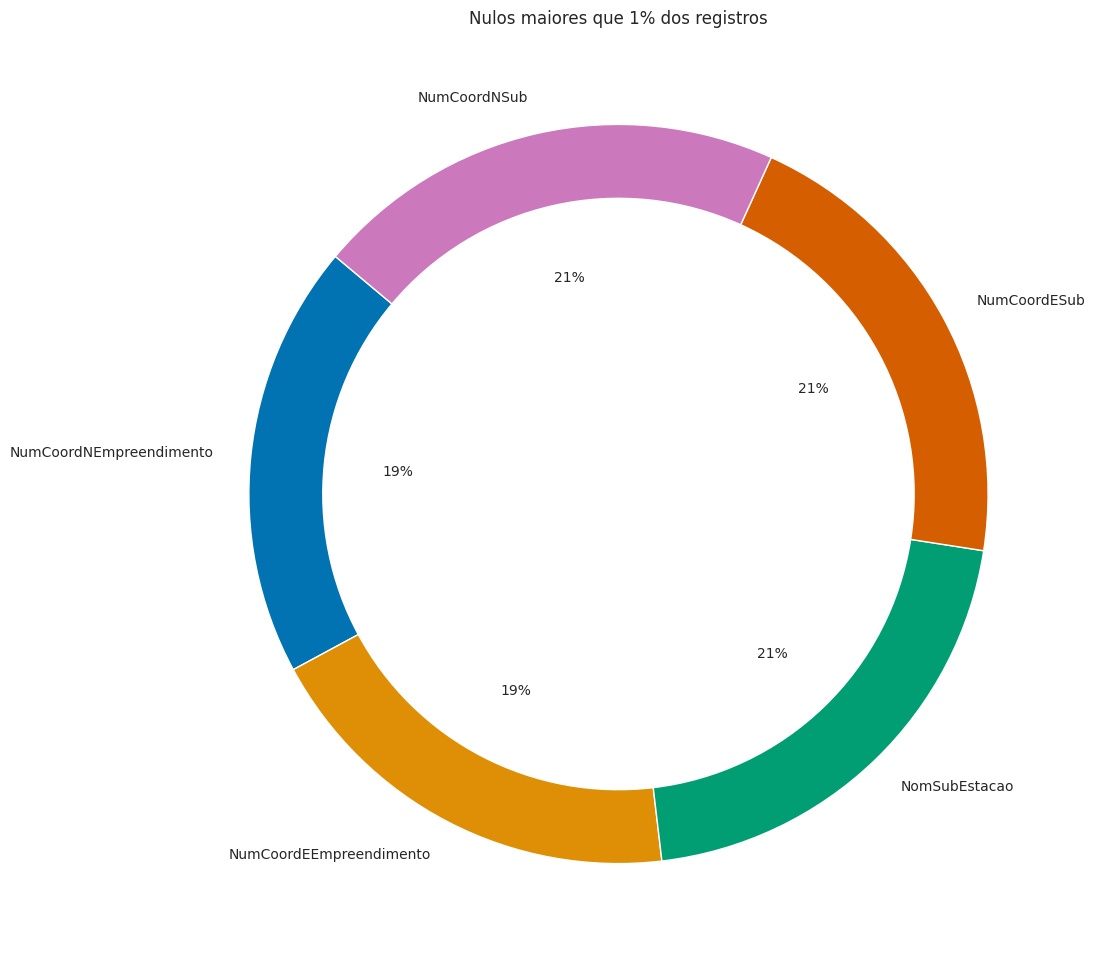

In [23]:
# Configuração do estilo de fundo
sns.set_style('whitegrid')

# Seleção da paleta de cores
sns.set_palette('colorblind')

# Calculando a quantidade de valores nulos por coluna
percent_nulos = df.isnull().sum()/len(df)*100
nulosMaior = percent_nulos[percent_nulos > 1]

# Criando um gráfico
plt.figure(figsize=(16, 12))
plt.pie(nulosMaior, labels=nulosMaior.index, autopct='%1.0f%%', startangle=140,
        colors=sns.color_palette(), wedgeprops=dict(width=0.2, edgecolor='w'))
plt.axis('on')

# Configuração do título
plt.title('Nulos maiores que 1% dos registros')

# Exibindo o gráfico
plt.show()

Valores nulos para view sem as colunas 'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento', 'NomSubEstacao',
       'NumCoordESub', 'NumCoordNSub'

In [24]:
# nome das colunas
df.columns

Index(['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia',
       'NumCNPJDistribuidora', 'SigAgente', 'NomAgente', 'CodClasseConsumo',
       'DscClasseConsumo', 'CodSubGrupoTarifario', 'DscSubGrupoTarifario',
       'codUFibge', 'SigUF', 'codRegiao', 'NomRegiao', 'CodMunicipioIbge',
       'NomMunicipio', 'CodCEP', 'SigTipoConsumidor', 'NumCPFCNPJ',
       'NomeTitularEmpreendimento', 'CodEmpreendimento',
       'DthAtualizaCadastralEmpreend', 'SigModalidadeEmpreendimento',
       'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
       'DscFonteGeracao', 'DscPorte', 'MdaPotenciaInstaladaKW',
       'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento', 'NomSubEstacao',
       'NumCoordESub', 'NumCoordNSub'],
      dtype='object')

In [25]:
# novo dataframe sem as colunas com nulos maior que 1% dos registros
nulosMenor = df[['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia',
                 'NumCNPJDistribuidora', 'SigAgente', 'NomAgente', 'CodClasseConsumo',
                 'DscClasseConsumo', 'CodSubGrupoTarifario', 'DscSubGrupoTarifario',
                 'codUFibge', 'SigUF', 'codRegiao', 'NomRegiao', 'CodMunicipioIbge',
                 'NomMunicipio', 'CodCEP', 'SigTipoConsumidor', 'NumCPFCNPJ',
                 'NomeTitularEmpreendimento', 'CodEmpreendimento',
                 'DthAtualizaCadastralEmpreend', 'SigModalidadeEmpreendimento',
                 'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
                 'DscFonteGeracao', 'DscPorte', 'MdaPotenciaInstaladaKW']]

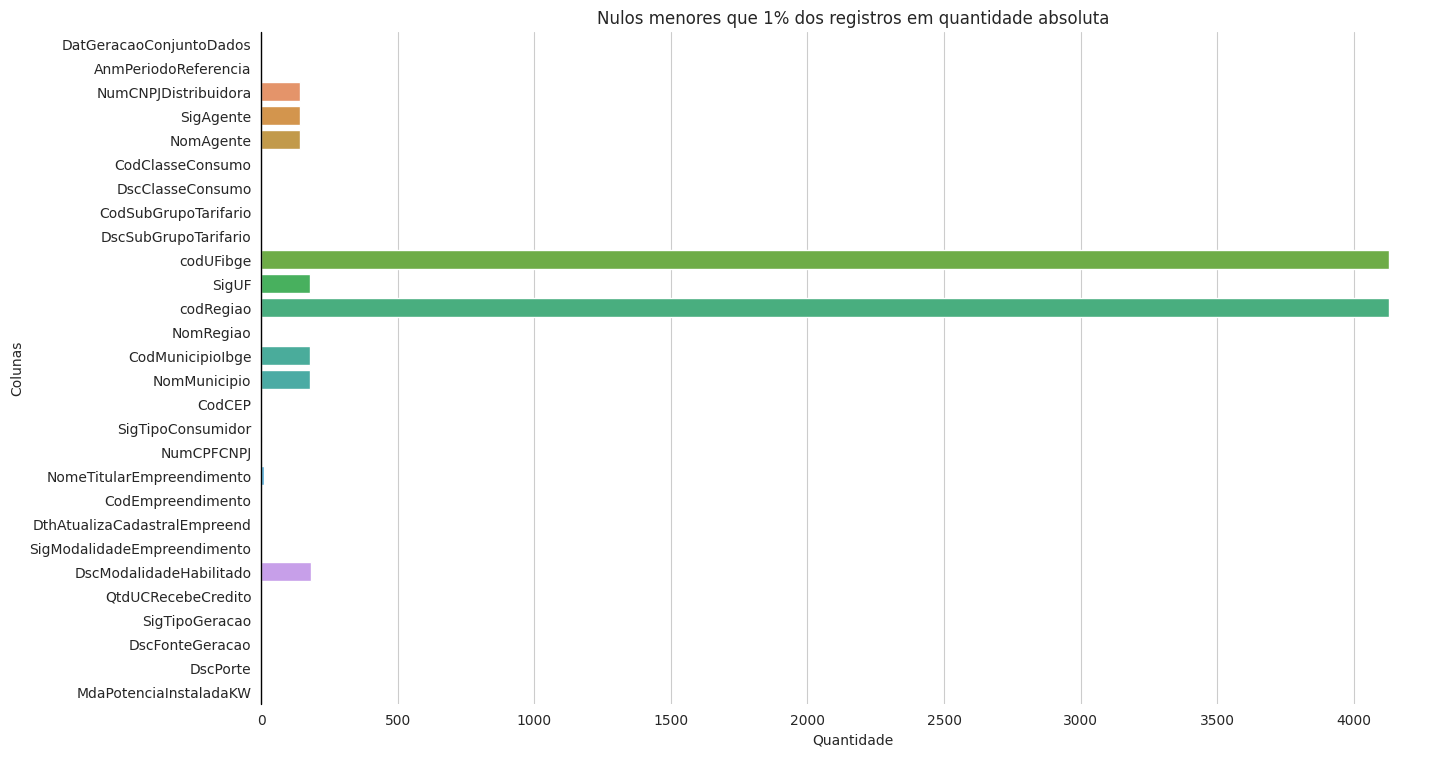

In [26]:
# configuração do estilo de fundo
sns.set_style('whitegrid')

# selecção da paleta de cores
sns.set_palette('colorblind')

# parâmetros do gráfico de barras do seaborn
axis = sns.barplot(y=(nulosMenor.count()).index,
                   x=nulosMenor[nulosMenor.columns].isnull().sum(), dodge=2)

# configurações dos eixos
axis.set(frame_on=False)
axis.axvline(0, color='k', clip_on=False, linewidth=1)
#axis.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x * 1e-3)))

# ajuste para plotagem nos eixos
plt.subplots_adjust(left=0.15, bottom=0.1, right=2, top=1.5)

# nomeação de eixos e título
plt.ylabel('Colunas')
plt.xlabel('Quantidade')
plt.title('Nulos menores que 1% dos registros em quantidade absoluta')

plt.show()

Caracteres inválidos

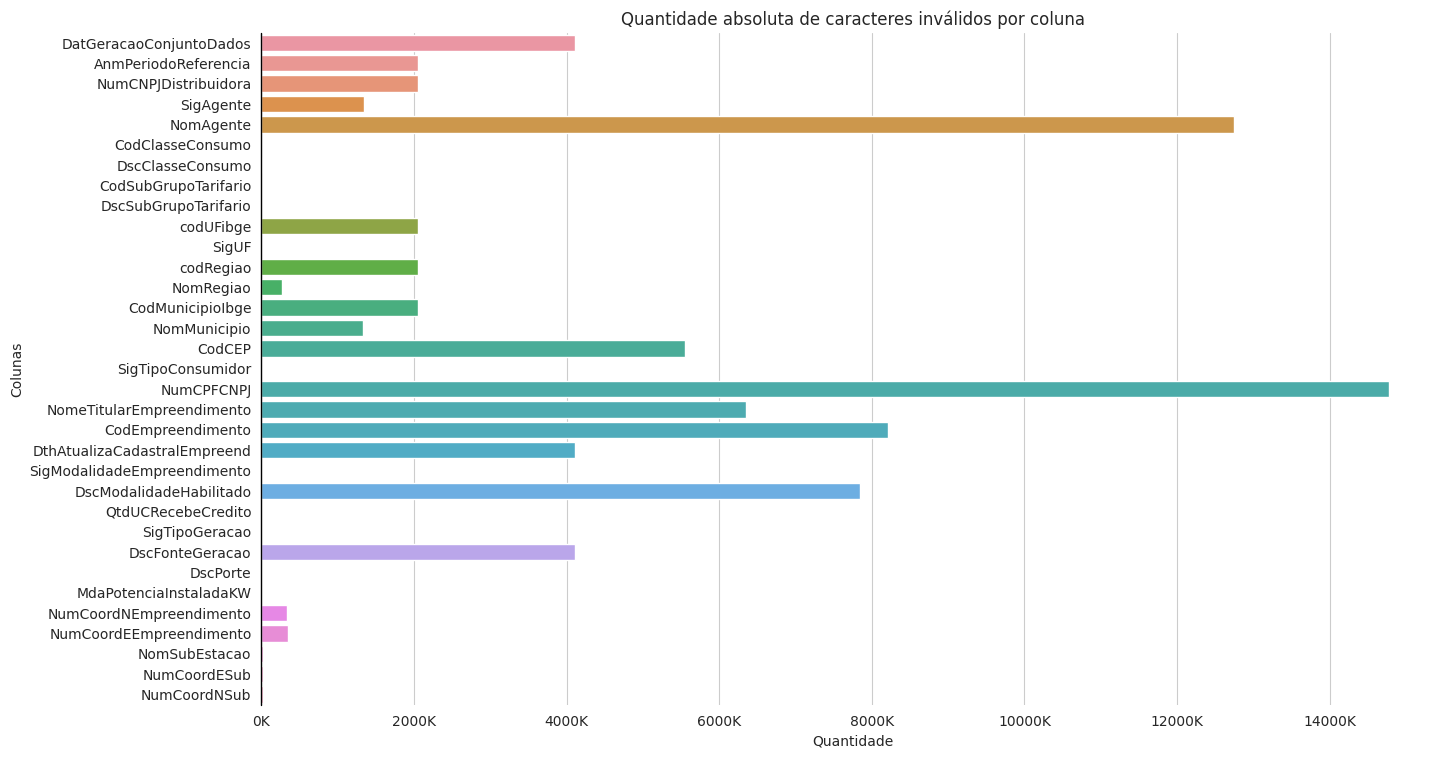

In [27]:
# configuração do estilo de fundo
sns.set_style('whitegrid')

# selecção da paleta de cores
sns.set_palette('colorblind')

# parâmetros do gráfico de barras do seaborn
axis = sns.barplot(y=(inv.count()).index, x=inv[inv.columns].sum(), dodge=2)

# configurações dos eixos
axis.set(frame_on=False)
axis.axvline(0, color='k', clip_on=False, linewidth=1)
axis.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x * 1e-3)))

# ajuste para plotagem nos eixos
plt.subplots_adjust(left=0.15, bottom=0.1, right=2, top=1.5)

# nomeação de eixos e título
plt.ylabel('Colunas')
plt.xlabel('Quantidade')
plt.title('Quantidade absoluta de caracteres inválidos por coluna')

plt.show()

###Backup

In [28]:
# Backup local
dfbackup1 = df.copy()

## Transformation
Aqui os dados extraídos precisam ser transformados em um formato adequado para análise, e para isso deve seguir alguns passos, que podem precisar serem repetidos ao longo do processo de análise.

#### Funções

Funções utilizadas nesta etapa

##### Função regex_replace

In [29]:
# função para substituição de caractere
def replace_single_char(text, target_char, replacement_char):
  '''Essa função retornará caractere substituído'''
  return re.sub(target_char, replacement_char, text)

##### Função exclusão NAN

In [30]:
def fnan(coluna, coluna_parametro):
  '''
  coluna = str
  filtro = str
  dicionario = {}
  coluna_parametro = str
  '''

  parametro = coluna_parametro

  lista = df[coluna].unique().tolist()
  if 'NAN' in lista:
    lista.remove('NAN')

  filtro = df.loc[df[coluna] == 'NAN']

  dicionario = {}

  for a, b in enumerate(lista):
    x = df[coluna_parametro][df[coluna]== lista[a]].unique().tolist()
    dicionario[str(x[0])] = float(b)

  for n in filtro[coluna_parametro]:
    for i, v in dicionario.items():
      if n == i:
        df[coluna] = df[coluna].replace('NAN', v)

  return df[coluna].unique()

##### Função verificar registros

In [31]:
def verificador(dataframe, valor):
  dicionario = {}

  for coluna in dataframe.columns:
    filtro = dataframe[coluna].loc[dataframe[coluna] == valor].count()
    dicionario[coluna] = filtro

  return dicionario

### Limpeza de Dados
Remover dados duplicados, corrigir erros de digitação, tratar dados inconsistentes etc.

### Subsituições

#### Substituição de caracter especial

In [32]:
# definição dos caracteres
target_char = '�'
replacement_char = 'c'

# chamando a função
df = df.applymap(lambda x: replace_single_char(str(x), target_char, replacement_char))

#### Upper

In [33]:
# padronizando registros em uppercase
df = df.applymap(lambda x: x.upper() if isinstance(x, str) else x)

##### Backup

In [34]:
dfbackup2 = df.copy()

#### Substituição de caracter com expressão regular

In [35]:
#df = df[~df.apply(lambda row: any('*' in str(cell) for cell in row), axis=1)]

target_char = '*'
replacement_char = '0'

df = df.applymap(lambda x: replace_single_char(str(x), re.escape(target_char), replacement_char))

##### Backup

In [36]:
dfbackup3 = df.copy()

#### Verificando nulos e duplicados

In [37]:
# Verificar se há valores duplicados
df.duplicated().sum()

0

In [38]:
# Verificar se há valores nulos/ausentes
df.isnull().sum()

DatGeracaoConjuntoDados         0
AnmPeriodoReferencia            0
NumCNPJDistribuidora            0
SigAgente                       0
NomAgente                       0
CodClasseConsumo                0
DscClasseConsumo                0
CodSubGrupoTarifario            0
DscSubGrupoTarifario            0
codUFibge                       0
SigUF                           0
codRegiao                       0
NomRegiao                       0
CodMunicipioIbge                0
NomMunicipio                    0
CodCEP                          0
SigTipoConsumidor               0
NumCPFCNPJ                      0
NomeTitularEmpreendimento       0
CodEmpreendimento               0
DthAtualizaCadastralEmpreend    0
SigModalidadeEmpreendimento     0
DscModalidadeHabilitado         0
QtdUCRecebeCredito              0
SigTipoGeracao                  0
DscFonteGeracao                 0
DscPorte                        0
MdaPotenciaInstaladaKW          0
NumCoordNEmpreendimento         0
NumCoordEEmpre

In [39]:
# Verificar se há valores nulos/ausentes
df.isna().sum()

DatGeracaoConjuntoDados         0
AnmPeriodoReferencia            0
NumCNPJDistribuidora            0
SigAgente                       0
NomAgente                       0
CodClasseConsumo                0
DscClasseConsumo                0
CodSubGrupoTarifario            0
DscSubGrupoTarifario            0
codUFibge                       0
SigUF                           0
codRegiao                       0
NomRegiao                       0
CodMunicipioIbge                0
NomMunicipio                    0
CodCEP                          0
SigTipoConsumidor               0
NumCPFCNPJ                      0
NomeTitularEmpreendimento       0
CodEmpreendimento               0
DthAtualizaCadastralEmpreend    0
SigModalidadeEmpreendimento     0
DscModalidadeHabilitado         0
QtdUCRecebeCredito              0
SigTipoGeracao                  0
DscFonteGeracao                 0
DscPorte                        0
MdaPotenciaInstaladaKW          0
NumCoordNEmpreendimento         0
NumCoordEEmpre

In [40]:
# Fazendo um relatório para mostrar os valores únicos de cada atributo.
# O for vai garantir que a atividade seja feita automaticamentepara todos os atributos

for coluna in df:
    valor = (df[coluna].unique())
    print("-"*70)
    msg = f"Valores únicos para o atributo {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)


----------------------------------------------------------------------
       Valores únicos para o atributo DatGeracaoConjuntoDados:        
----------------------------------------------------------------------

['2023-07-31']

----------------------------------------------------------------------
----------------------------------------------------------------------
         Valores únicos para o atributo AnmPeriodoReferencia:         
----------------------------------------------------------------------

['07/2023']

----------------------------------------------------------------------
----------------------------------------------------------------------
         Valores únicos para o atributo NumCNPJDistribuidora:         
----------------------------------------------------------------------

['8336783000190.0' '61695227000193.0' '2302100000106.0' '2328280000197.0'
 '33050196000188.0' '53859112000169.0' '4172213000151.0' '7282377000120.0'
 '60444437000146.0' '33050071000158.0'

In [41]:
# Verificando os valores presentes na coluna para identificar inconsistencias
for coluna in df:
    valor = (df[coluna].groupby(df[coluna]).count())
    print("-"*70)
    msg = f"Contando valores {coluna}:"
    print(f"{msg:^70}")
    print("-"*70)
    print(f"\n{valor}\n")
    print("-"*70)

----------------------------------------------------------------------
              Contando valores DatGeracaoConjuntoDados:               
----------------------------------------------------------------------

DatGeracaoConjuntoDados
2023-07-31    2053221
Name: DatGeracaoConjuntoDados, dtype: int64

----------------------------------------------------------------------
----------------------------------------------------------------------
                Contando valores AnmPeriodoReferencia:                
----------------------------------------------------------------------

AnmPeriodoReferencia
07/2023    2053221
Name: AnmPeriodoReferencia, dtype: int64

----------------------------------------------------------------------
----------------------------------------------------------------------
                Contando valores NumCNPJDistribuidora:                
----------------------------------------------------------------------

NumCNPJDistribuidora
10532365000110.0      

In [42]:
# Verificando valores únicos para codUFibge, inclusive NAN
df.codUFibge.unique()

array(['42.0', '35.0', '33.0', '32.0', '31.0', '29.0', 'NAN', '28.0',
       '26.0', '27.0', '25.0', '24.0', '23.0', '22.0', '21.0', '15.0',
       '16.0', '13.0', '14.0', '12.0', '53.0', '52.0', '11.0', '17.0',
       '51.0', '50.0', '41.0', '43.0'], dtype=object)

In [43]:
# Verificando valores únicos para codRegiao, inclusive NAN
df.codRegiao.unique()

array(['4204.0', '3515.0', '3513.0', '3507.0', '3506.0', '3505.0',
       '3502.0', '3501.0', '3503.0', '3504.0', '3508.0', '3512.0',
       '3511.0', '3510.0', '3306.0', '3301.0', '3302.0', '3304.0',
       '3203.0', '3204.0', '3201.0', '3202.0', '3107.0', '3108.0',
       '3109.0', '3112.0', '3110.0', '3105.0', '3102.0', '3103.0',
       '3104.0', '2905.0', '2903.0', '2907.0', '2906.0', 'NAN', '2902.0',
       '2803.0', '2802.0', '2801.0', '2605.0', '2603.0', '2602.0',
       '2703.0', '2504.0', '2503.0', '2502.0', '2501.0', '2404.0',
       '2402.0', '2401.0', '2303.0', '2301.0', '2302.0', '2305.0',
       '2307.0', '2306.0', '2304.0', '2202.0', '2203.0', '2101.0',
       '2104.0', '2105.0', '2102.0', '2103.0', '1503.0', '1505.0',
       '1506.0', '1602.0', '1303.0', '1401.0', '1402.0', '1202.0',
       '5301.0', '5204.0', '5203.0', '5205.0', '5201.0', '1101.0',
       '1102.0', '1702.0', '1701.0', '5104.0', '5103.0', '5101.0',
       '5102.0', '5105.0', '5002.0', '5004.0', '5003.0'

In [44]:
# Verificando valores únicos para CodMunicipioIbge, inclusive NAN
df.CodMunicipioIbge.unique()

array(['4210852.0', '3550308.0', '3510609.0', ..., '1304104.0',
       '1301506.0', '1301605.0'], dtype=object)

In [45]:
# Lista IBGE
#listaIbge = df.codUFibge.unique().tolist()
#if 'NAN' in listaIbge:
#  listaIbge.remove('NAN')

#listaIbge

In [46]:
# Verificando valores únicos para SigUF, inclusive NAN
df.SigUF.unique()

array(['SC', 'SP', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB', 'RN',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'AC', 'DF', 'GO', 'RO',
       'TO', 'MT', 'MS', 'PR', 'RS', 'NAN'], dtype=object)

In [47]:
# Lista UF únicas
listaUF = df.SigUF.unique()
listaUF = listaUF[:-1].tolist()
listaUF

['SC',
 'SP',
 'RJ',
 'ES',
 'MG',
 'BA',
 'SE',
 'PE',
 'AL',
 'PB',
 'RN',
 'CE',
 'PI',
 'MA',
 'PA',
 'AP',
 'AM',
 'RR',
 'AC',
 'DF',
 'GO',
 'RO',
 'TO',
 'MT',
 'MS',
 'PR',
 'RS']

##### Backup

In [48]:
dfbackup4 = df.copy()

#### Coluna UF

Ajusta coluna UF retirando valores 'NAN'

In [49]:
# filtro NAN para UF
filtroUF = df.loc[df['SigUF'] == 'NAN']

In [50]:
# Laço de repetição para substituição dos valores NAN em SigUF pela UF inserida no CodEmpreendimento
for n in filtroUF['CodEmpreendimento']:
  for m in listaUF:
    if str(n).startswith(f'GD.{m}'):
      df['SigUF'] = df['SigUF'].replace('NAN', f'{m}')
    else:
      pass

In [51]:
# Verificando valores únicos para SigUF, retirando NAN
df.SigUF.unique()

array(['SC', 'SP', 'RJ', 'ES', 'MG', 'BA', 'SE', 'PE', 'AL', 'PB', 'RN',
       'CE', 'PI', 'MA', 'PA', 'AP', 'AM', 'RR', 'AC', 'DF', 'GO', 'RO',
       'TO', 'MT', 'MS', 'PR', 'RS'], dtype=object)

In [52]:
# contagem número de agentes
df['SigUF'].value_counts()

SP    330705
RS    260536
MG    252624
PR    174880
BA    109749
RJ     98543
MT     91661
GO     87774
SC     80947
MS     77050
CE     65545
PE     62719
PA     58325
RN     47085
ES     39860
PI     38516
MA     38293
TO     29093
PB     25058
AL     20960
RO     18319
DF     16579
SE     10633
AM      8072
AC      4875
AP      2822
RR      1998
Name: SigUF, dtype: int64

#### Colunas COD IBGE

Ajuste das colunas a seguir, substituindo valores 'NAN'
* codRegiao
* codUFibge
* CodMunicipioIbge

In [53]:
fnan('codRegiao', 'NomRegiao')

array(['4204.0', '3515.0', '3513.0', '3507.0', '3506.0', '3505.0',
       '3502.0', '3501.0', '3503.0', '3504.0', '3508.0', '3512.0',
       '3511.0', '3510.0', '3306.0', '3301.0', '3302.0', '3304.0',
       '3203.0', '3204.0', '3201.0', '3202.0', '3107.0', '3108.0',
       '3109.0', '3112.0', '3110.0', '3105.0', '3102.0', '3103.0',
       '3104.0', '2905.0', '2903.0', '2907.0', '2906.0', 2204.0, '2902.0',
       '2803.0', '2802.0', '2801.0', '2605.0', '2603.0', '2602.0',
       '2703.0', '2504.0', '2503.0', '2502.0', '2501.0', '2404.0',
       '2402.0', '2401.0', '2303.0', '2301.0', '2302.0', '2305.0',
       '2307.0', '2306.0', '2304.0', '2202.0', '2203.0', '2101.0',
       '2104.0', '2105.0', '2102.0', '2103.0', '1503.0', '1505.0',
       '1506.0', '1602.0', '1303.0', '1401.0', '1402.0', '1202.0',
       '5301.0', '5204.0', '5203.0', '5205.0', '5201.0', '1101.0',
       '1102.0', '1702.0', '1701.0', '5104.0', '5103.0', '5101.0',
       '5102.0', '5105.0', '5002.0', '5004.0', '5003.0

In [54]:
fnan('codUFibge', 'SigUF')

array(['42.0', '35.0', '33.0', '32.0', '31.0', '29.0', 29.0, '28.0',
       '26.0', '27.0', '25.0', '24.0', '23.0', '22.0', '21.0', '15.0',
       '16.0', '13.0', '14.0', '12.0', '53.0', '52.0', '11.0', '17.0',
       '51.0', '50.0', '41.0', '43.0'], dtype=object)

In [55]:
fnan('CodMunicipioIbge', 'NomMunicipio')

array(['4210852.0', '3550308.0', '3510609.0', ..., '1304104.0',
       '1301506.0', '1301605.0'], dtype=object)

#### Verificando inconsistências

In [56]:
# Verificando os valores presentes na coluna para identificar inconsistencias
verificador(df, 'NAN')

{'DatGeracaoConjuntoDados': 0,
 'AnmPeriodoReferencia': 0,
 'NumCNPJDistribuidora': 140,
 'SigAgente': 140,
 'NomAgente': 140,
 'CodClasseConsumo': 0,
 'DscClasseConsumo': 0,
 'CodSubGrupoTarifario': 0,
 'DscSubGrupoTarifario': 0,
 'codUFibge': 0,
 'SigUF': 0,
 'codRegiao': 0,
 'NomRegiao': 0,
 'CodMunicipioIbge': 180,
 'NomMunicipio': 180,
 'CodCEP': 2,
 'SigTipoConsumidor': 2,
 'NumCPFCNPJ': 2,
 'NomeTitularEmpreendimento': 9,
 'CodEmpreendimento': 1,
 'DthAtualizaCadastralEmpreend': 0,
 'SigModalidadeEmpreendimento': 0,
 'DscModalidadeHabilitado': 181,
 'QtdUCRecebeCredito': 0,
 'SigTipoGeracao': 0,
 'DscFonteGeracao': 0,
 'DscPorte': 0,
 'MdaPotenciaInstaladaKW': 0,
 'NumCoordNEmpreendimento': 1875730,
 'NumCoordEEmpreendimento': 1875730,
 'NomSubEstacao': 2041397,
 'NumCoordESub': 2041397,
 'NumCoordNSub': 2041397}

In [57]:
# Listar colunas
df.columns

Index(['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia',
       'NumCNPJDistribuidora', 'SigAgente', 'NomAgente', 'CodClasseConsumo',
       'DscClasseConsumo', 'CodSubGrupoTarifario', 'DscSubGrupoTarifario',
       'codUFibge', 'SigUF', 'codRegiao', 'NomRegiao', 'CodMunicipioIbge',
       'NomMunicipio', 'CodCEP', 'SigTipoConsumidor', 'NumCPFCNPJ',
       'NomeTitularEmpreendimento', 'CodEmpreendimento',
       'DthAtualizaCadastralEmpreend', 'SigModalidadeEmpreendimento',
       'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
       'DscFonteGeracao', 'DscPorte', 'MdaPotenciaInstaladaKW',
       'NumCoordNEmpreendimento', 'NumCoordEEmpreendimento', 'NomSubEstacao',
       'NumCoordESub', 'NumCoordNSub'],
      dtype='object')

##### Backup

In [58]:
# Backup
dfbackup5 = df.copy()

#### Exclusão de valores nulos

In [59]:
# Exclusão de outros valores nulos
df = df.dropna()

#### Seleção de colunas

In [60]:
# Colunas válidas
df = df[['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia',
       'NumCNPJDistribuidora', 'SigAgente', 'NomAgente', 'CodClasseConsumo',
       'DscClasseConsumo', 'CodSubGrupoTarifario', 'DscSubGrupoTarifario',
       'codUFibge', 'SigUF', 'codRegiao', 'NomRegiao', 'CodMunicipioIbge',
       'NomMunicipio', 'CodCEP', 'SigTipoConsumidor', 'NumCPFCNPJ',
       'NomeTitularEmpreendimento', 'CodEmpreendimento',
       'DthAtualizaCadastralEmpreend', 'SigModalidadeEmpreendimento',
       'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
       'DscFonteGeracao', 'DscPorte', 'MdaPotenciaInstaladaKW']]

In [61]:
# Filtro e seleção de colunas
df = df[df != 'NAN']

In [62]:
# Verificando seleção
verificador(df, 'NAN')

{'DatGeracaoConjuntoDados': 0,
 'AnmPeriodoReferencia': 0,
 'NumCNPJDistribuidora': 0,
 'SigAgente': 0,
 'NomAgente': 0,
 'CodClasseConsumo': 0,
 'DscClasseConsumo': 0,
 'CodSubGrupoTarifario': 0,
 'DscSubGrupoTarifario': 0,
 'codUFibge': 0,
 'SigUF': 0,
 'codRegiao': 0,
 'NomRegiao': 0,
 'CodMunicipioIbge': 0,
 'NomMunicipio': 0,
 'CodCEP': 0,
 'SigTipoConsumidor': 0,
 'NumCPFCNPJ': 0,
 'NomeTitularEmpreendimento': 0,
 'CodEmpreendimento': 0,
 'DthAtualizaCadastralEmpreend': 0,
 'SigModalidadeEmpreendimento': 0,
 'DscModalidadeHabilitado': 0,
 'QtdUCRecebeCredito': 0,
 'SigTipoGeracao': 0,
 'DscFonteGeracao': 0,
 'DscPorte': 0,
 'MdaPotenciaInstaladaKW': 0}

In [63]:
# Contagem de registros
df.count()

DatGeracaoConjuntoDados         2053221
AnmPeriodoReferencia            2053221
NumCNPJDistribuidora            2053081
SigAgente                       2053081
NomAgente                       2053081
CodClasseConsumo                2053221
DscClasseConsumo                2053221
CodSubGrupoTarifario            2053221
DscSubGrupoTarifario            2053221
codUFibge                       2053221
SigUF                           2053221
codRegiao                       2053221
NomRegiao                       2053221
CodMunicipioIbge                2053041
NomMunicipio                    2053041
CodCEP                          2053219
SigTipoConsumidor               2053219
NumCPFCNPJ                      2053219
NomeTitularEmpreendimento       2053212
CodEmpreendimento               2053220
DthAtualizaCadastralEmpreend    2053221
SigModalidadeEmpreendimento     2053221
DscModalidadeHabilitado         2053040
QtdUCRecebeCredito              2053221
SigTipoGeracao                  2053221


### Normalização de Dados
Colocar os dados em um formato padronizado para facilitar a análise.

#### **Tipagem**

In [64]:
df.sample(3)

,DatGeracaoConjuntoDados,AnmPeriodoReferencia,NumCNPJDistribuidora,SigAgente,NomAgente,CodClasseConsumo,DscClasseConsumo,CodSubGrupoTarifario,DscSubGrupoTarifario,codUFibge,SigUF,codRegiao,NomRegiao,CodMunicipioIbge,NomMunicipio,CodCEP,SigTipoConsumidor,NumCPFCNPJ,NomeTitularEmpreendimento,CodEmpreendimento,DthAtualizaCadastralEmpreend,SigModalidadeEmpreendimento,DscModalidadeHabilitado,QtdUCRecebeCredito,SigTipoGeracao,DscFonteGeracao,DscPorte,MdaPotenciaInstaladaKW
13478,2023-07-31,07/2023,33050196000188.0,CPFL-PAULISTA,COMPANHIA PAULISTA DE FORÇA E LUZ,1,RESIDENCIAL,9,B1,35.0,SP,3504.0,SUDESTE,3525300.0,JAÚ,17206000,PF,000.868.868-00,000,GD.SP.000.658.330,2021-10-27,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,300
1990650,2023-07-31,07/2023,53859112000169.0,CPFL JAGUARI,COMPANHIA JAGUARI DE ENERGIA,3,RURAL,10,B2,41.0,PR,4104.0,SUL,4111803.0,JACAREZINHO,86400000,PF,000.004.179-00,000,GD.PR.000.924.576,2021-12-29,R,CARACTERIZADA COMO AUTOCONSUMO REMOTO,3,UFV,RADIACÃO SOLAR,MICROGERACAO,600
2004059,2023-07-31,07/2023,10835932000108.0,CELPE,COMPANHIA ENERGÉTICA DE PERNAMBUCO,2,COMERCIAL,11,B3,26.0,PE,2603.0,NORDESTE,2601904.0,BEZERROS,55660000,PF,000.435.504-00,000,GD.PE.000.370.788,2020-11-26,R,CARACTERIZADA COMO AUTOCONSUMO REMOTO,12,UFV,RADIACÃO SOLAR,MICROGERACAO,5000


In [65]:
# Realizando a tipagem das variaveis

df.CodClasseConsumo = df.CodClasseConsumo.astype(int)
df.CodSubGrupoTarifario = df.CodSubGrupoTarifario.astype(int)
df.codUFibge = df.codUFibge.astype(float).astype(int)
df.codRegiao = df.codRegiao.astype(float).astype(int)
df.CodMunicipioIbge = df.CodMunicipioIbge.fillna(0).astype(float).astype(int)
df.DthAtualizaCadastralEmpreend = df.DthAtualizaCadastralEmpreend.astype('datetime64[ns]')
df.QtdUCRecebeCredito = df.QtdUCRecebeCredito.astype(int)
df.MdaPotenciaInstaladaKW = df.MdaPotenciaInstaladaKW.astype(int)

In [66]:
# Criação de coluna com valor Ano
df['anoCadastral'] = df.DthAtualizaCadastralEmpreend.dt.year

In [67]:
# Verificando criação da coluna e tipo do dado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2053221 entries, 0 to 2053220
Data columns (total 29 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   DatGeracaoConjuntoDados       object        
 1   AnmPeriodoReferencia          object        
 2   NumCNPJDistribuidora          object        
 3   SigAgente                     object        
 4   NomAgente                     object        
 5   CodClasseConsumo              int64         
 6   DscClasseConsumo              object        
 7   CodSubGrupoTarifario          int64         
 8   DscSubGrupoTarifario          object        
 9   codUFibge                     int64         
 10  SigUF                         object        
 11  codRegiao                     int64         
 12  NomRegiao                     object        
 13  CodMunicipioIbge              int64         
 14  NomMunicipio                  object        
 15  CodCEP                        ob

In [68]:
# Contagem de registros
df.count()

DatGeracaoConjuntoDados         2053221
AnmPeriodoReferencia            2053221
NumCNPJDistribuidora            2053081
SigAgente                       2053081
NomAgente                       2053081
CodClasseConsumo                2053221
DscClasseConsumo                2053221
CodSubGrupoTarifario            2053221
DscSubGrupoTarifario            2053221
codUFibge                       2053221
SigUF                           2053221
codRegiao                       2053221
NomRegiao                       2053221
CodMunicipioIbge                2053221
NomMunicipio                    2053041
CodCEP                          2053219
SigTipoConsumidor               2053219
NumCPFCNPJ                      2053219
NomeTitularEmpreendimento       2053212
CodEmpreendimento               2053220
DthAtualizaCadastralEmpreend    2053221
SigModalidadeEmpreendimento     2053221
DscModalidadeHabilitado         2053040
QtdUCRecebeCredito              2053221
SigTipoGeracao                  2053221


#### Tradução | Ajustes nomes

In [69]:
# Lista de nome das colunas atuais
colunas_atuais = df.columns
colunas_atuais

Index(['DatGeracaoConjuntoDados', 'AnmPeriodoReferencia',
       'NumCNPJDistribuidora', 'SigAgente', 'NomAgente', 'CodClasseConsumo',
       'DscClasseConsumo', 'CodSubGrupoTarifario', 'DscSubGrupoTarifario',
       'codUFibge', 'SigUF', 'codRegiao', 'NomRegiao', 'CodMunicipioIbge',
       'NomMunicipio', 'CodCEP', 'SigTipoConsumidor', 'NumCPFCNPJ',
       'NomeTitularEmpreendimento', 'CodEmpreendimento',
       'DthAtualizaCadastralEmpreend', 'SigModalidadeEmpreendimento',
       'DscModalidadeHabilitado', 'QtdUCRecebeCredito', 'SigTipoGeracao',
       'DscFonteGeracao', 'DscPorte', 'MdaPotenciaInstaladaKW',
       'anoCadastral'],
      dtype='object')

In [70]:
# Lista de nome de colunas atualizados
subs_colunas = ['dataPesquisa', 'periodoPesquisa',
       'idDistribuidora', 'agenteAbreviado', 'agenteNome', 'classeConsumo',
       'nomeClasseConsumo', 'subgrupoTarifa', 'nomeSubgrupoTarifa',
       'ufIbge', 'uf', 'regiaoIbge', 'regiaoNome', 'municipioIbge',
       'municipio', 'CEP', 'tipoConsumidor', 'idConsumidor',
       'nomeTitularEmpreendimento', 'idEmpreendimento',
       'cadastroEmpreendimento', 'tipoEmpreendimento',
       'tipoHabilitado', 'creditoReceber', 'tipoGeracao',
       'fonteGeracao', 'porte', 'potenciaInstalada(KW)', 'anoCadastral']

In [71]:
# Substituição dos nomes das colunas
df.columns = subs_colunas

In [72]:
# Verificação dos nomes de colunas
df.columns

Index(['dataPesquisa', 'periodoPesquisa', 'idDistribuidora', 'agenteAbreviado',
       'agenteNome', 'classeConsumo', 'nomeClasseConsumo', 'subgrupoTarifa',
       'nomeSubgrupoTarifa', 'ufIbge', 'uf', 'regiaoIbge', 'regiaoNome',
       'municipioIbge', 'municipio', 'CEP', 'tipoConsumidor', 'idConsumidor',
       'nomeTitularEmpreendimento', 'idEmpreendimento',
       'cadastroEmpreendimento', 'tipoEmpreendimento', 'tipoHabilitado',
       'creditoReceber', 'tipoGeracao', 'fonteGeracao', 'porte',
       'potenciaInstalada(KW)', 'anoCadastral'],
      dtype='object')

In [73]:
# Verificação dos tipos de dados para cada coluna
df.dtypes

dataPesquisa                         object
periodoPesquisa                      object
idDistribuidora                      object
agenteAbreviado                      object
agenteNome                           object
classeConsumo                         int64
nomeClasseConsumo                    object
subgrupoTarifa                        int64
nomeSubgrupoTarifa                   object
ufIbge                                int64
uf                                   object
regiaoIbge                            int64
regiaoNome                           object
municipioIbge                         int64
municipio                            object
CEP                                  object
tipoConsumidor                       object
idConsumidor                         object
nomeTitularEmpreendimento            object
idEmpreendimento                     object
cadastroEmpreendimento       datetime64[ns]
tipoEmpreendimento                   object
tipoHabilitado                  

# **Qualidade e integridade dos dados**

Exclusão de valores nulos persistentes

In [74]:
df = df.dropna()

### **Validação da estrutura dos dados (schema)**

In [75]:
# Definindo o esquema de validação e o examinando
schema = pa.DataFrameSchema({
    'dataPesquisa': pa.Column(pa.String),
    'periodoPesquisa': pa.Column(pa.String),
    'idDistribuidora': pa.Column(pa.String),
    'agenteAbreviado': pa.Column(pa.String),
    'agenteNome': pa.Column(pa.String),
    'classeConsumo': pa.Column(pa.Int),
    'nomeClasseConsumo': pa.Column(pa.String),
    'subgrupoTarifa': pa.Column(pa.Int),
    'nomeSubgrupoTarifa': pa.Column(pa.String),
    'ufIbge': pa.Column(pa.Int),
    'uf': pa.Column(pa.String),
    'regiaoIbge': pa.Column(pa.Int),
    'regiaoNome': pa.Column(pa.String),
    'municipioIbge': pa.Column(pa.Int),
    'municipio': pa.Column(pa.String),
    'CEP': pa.Column(pa.String),
    'tipoConsumidor': pa.Column(pa.String),
    'idConsumidor': pa.Column(pa.String),
    'nomeTitularEmpreendimento': pa.Column(pa.String),
    'idEmpreendimento': pa.Column(pa.String),
    'cadastroEmpreendimento': pa.Column(pa.Timestamp),
    'tipoEmpreendimento': pa.Column(pa.String),
    'tipoHabilitado': pa.Column(pa.String),
    'creditoReceber': pa.Column(pa.Int),
    'tipoGeracao': pa.Column(pa.String),
    'fonteGeracao': pa.Column(pa.String),
    'porte': pa.Column(pa.String),
    'potenciaInstalada(KW)': pa.Column(pa.Int),
    'anoCadastral': pa.Column(pa.Int)
})

schema.validate(df)

,dataPesquisa,periodoPesquisa,idDistribuidora,agenteAbreviado,agenteNome,classeConsumo,nomeClasseConsumo,subgrupoTarifa,nomeSubgrupoTarifa,ufIbge,uf,regiaoIbge,regiaoNome,municipioIbge,municipio,CEP,tipoConsumidor,idConsumidor,nomeTitularEmpreendimento,idEmpreendimento,cadastroEmpreendimento,tipoEmpreendimento,tipoHabilitado,creditoReceber,tipoGeracao,fonteGeracao,porte,potenciaInstalada(KW),anoCadastral
0,2023-07-31,07/2023,8336783000190.0,CELESC-DIS,CELESC DISTRIBUICÃO S.A,5,PODER PÚBLICO,11,B3,42,SC,4204,SUL,4210852,MIRIM DOCE,00000000,PJ,95952289000155,MIRIM DOCE CAMARA DE VEREADORES,GD.SC.000.188.684,2020-01-20,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,500,2020
1,2023-07-31,07/2023,61695227000193.0,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,6,SERVIÇO PÚBLICO,7,A4,35,SP,3515,SUDESTE,3550308,SÃO PAULO,01109010,PJ,10882594001722,"INSTITUTO FEDERAL DE EDUCACÃO, CIÊNCIA E TECN.",GD.SP.000.027.612,2017-07-12,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,6996,2017
2,2023-07-31,07/2023,61695227000193.0,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,PODER PÚBLICO,9,B1,35,SP,3515,SUDESTE,3550308,SÃO PAULO,04115000,PF,000.015.418-00,000,GD.SP.000.081.118,2019-05-30,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,300,2019
3,2023-07-31,07/2023,61695227000193.0,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,PODER PÚBLICO,9,B1,35,SP,3515,SUDESTE,3510609,CARAPICUÍBA,06364000,PF,000.517.398-00,000,GD.SP.000.210.094,2020-03-30,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,300,2020
4,2023-07-31,07/2023,61695227000193.0,ELETROPAULO,ELETROPAULO METROPOLITANA ELETRICIDADE DE SÃO ...,5,PODER PÚBLICO,7,A4,35,SP,3515,SUDESTE,3505708,BARUERI,06462080,PJ,46523015000135,MUNICIPIO DE BARUERI,GD.SP.000.863.525,2021-04-02,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,2300,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053216,2023-07-31,07/2023,8324196000181.0,COSERN,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...,7,ILUMINACÃO PÚBLICA,9,B1,24,RN,2404,NORDESTE,2403251,PARNAMIRIM,59152000,PF,000.368.374-00,000,GD.RN.000.549.804,2021-07-31,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,737,2021
2053217,2023-07-31,07/2023,8324196000181.0,COSERN,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...,7,ILUMINACÃO PÚBLICA,9,B1,24,RN,2402,NORDESTE,2402006,CAICÓ,59300000,PF,000.405.104-00,000,GD.RN.000.863.246,2022-02-25,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,300,2022
2053218,2023-07-31,07/2023,8324196000181.0,COSERN,COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE CO...,7,ILUMINACÃO PÚBLICA,10,B2,24,RN,2402,NORDESTE,2407203,MACAU,59500000,PF,000.771.634-00,000,GD.RN.000.349.903,2020-11-06,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,600,2020
2053219,2023-07-31,07/2023,7047251000170.0,ENEL CE,COMPANHIA ENERGÉTICA DO CEARÁ,7,ILUMINACÃO PÚBLICA,11,B3,23,CE,2303,NORDESTE,2304400,FORTALEZA,60878085,PJ,23552466000103,RENOVADORA DE P SAO LUIS LTDA,GD.CE.000.166.397,2019-12-31,P,COM MICROGERACAO OU MINIGERACAO DISTRIBUIDA,1,UFV,RADIACÃO SOLAR,MICROGERACAO,4460,2019


## **Colunas Persistidas**

=============================================================
STRING
=============================================================


* dataPesquisa                         
* periodoPesquisa                      
* idDistribuidora                      
* agenteAbreviado                      
* agenteNome                           
* nomeSubgrupoTarifa                   
* nomeClasseConsumo                    
* uf                                   
* regiaoNome                           
* municipio                            
* CEP                                  
* tipoConsumidor                       
* idConsumidor                         
* nomeTitularEmpreendimento            
* idEmpreendimento                     
* tipoEmpreendimento                   
* tipoHabilitado                       
* tipoGeracao                          
* fonteGeracao                         
* porte                                                           

=============================================================
INT
=============================================================

* classeConsumo                         
* subgrupoTarifa                        
* anoCadastral                          
* creditoReceber                        
* potenciaInstalada(KW)                 

=============================================================
FLOAT
=============================================================
                           
* ufIbge                              
* regiaoSigla                         
* municipioIbge                       

=============================================================
DATETIME
=============================================================
* cadastroEmpreendimento       

## Copia de segurança do tratamento - Backup

In [76]:
# Backup para analise
df_tratado = df.copy()

## Load
Depois que os dados são extraídos e transformados adequadamente, eles estarão prontos para as análise, mas antes disso eles precisam ser carregados em um local de armazenamento adequado. Podendo ser um banco de dados SQL ou NoSQL, um sistema de armazenamento em nuvem, e para o caso de disponibilizar o projeto publicamente é ideal que ele seja colocar em uma pasta de datasets, diferenciando o arquivo bruto e o tratado.

In [77]:
# Carregametno GCP
df_tratado.to_csv('gs://projeto-final-ad2-e8/dados/tratados/tratado_geracao_distribuida.csv', index=False)

In [78]:
print('Notebook executado com SUCESSO!!!')

Notebook executado com SUCESSO!!!
